<a href="https://colab.research.google.com/github/lakatosgabor/product-detection/blob/main/product_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://yolov8.com/

https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/


In [ ]:
pip install ultralytics

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="5p4kN6wiCOHEiPNclMDR")
project = rf.workspace("pannon-unversity").project("product-h5vmu")
version = project.version(1)
dataset = version.download("yolov8")

In [ ]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data=/content/data.yaml \
epochs=100 \
imgsz=640

In [ ]:
!yolo task=detect \
mode=predict \
model=/content/runs/detect/train2/weights/best.pt \
conf=0.25 \
source=/content/images

In [48]:
from ultralytics import YOLO
model = YOLO("/content/runs/detect/train2/weights/best.pt") # load the model
model.fuse()

Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


In [71]:
frame = "/content/images/test.jpg"
detections = model(frame, conf=0.7, show=False)


image 1/1 /content/images/test.jpg: 416x640 9 KOM004s, 20.2ms
Speed: 3.4ms preprocess, 20.2ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 640)


In [69]:
for result in detections:
    print(len(result.boxes))

9


In [60]:
from PIL import Image
from ultralytics import YOLO

for i, r in enumerate(detections):
    im_bgr = r.plot()
    im_rgb = Image.fromarray(im_bgr[..., ::-1])
    r.show()
    r.save(filename=f'results{i}.jpg')

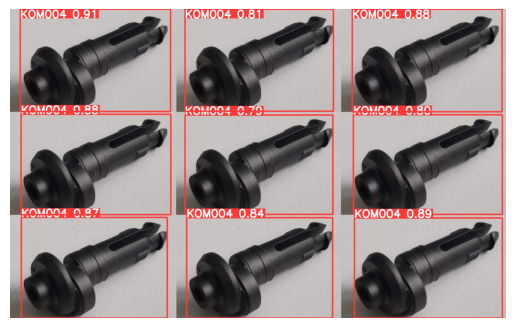

In [73]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/results0.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()